In [2]:
import mglearn
import numpy as np 
import pandas as pd 
import seaborn as sb 
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
x_data = mnist.data      
y_data = mnist.target
x_data.shape, y_data.shape  # image pixel

((70000, 784), (70000,))

In [6]:
y_data

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
x_data[0].shape

(784,)

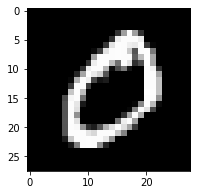

In [8]:
plt.figure(figsize=(3,3))
plt.imshow( x_data[1].reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [9]:
model = MLPClassifier( verbose=1 )
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, stratify=y_data )
model.fit( x_train, y_train )

Iteration 1, loss = 6.47017600
Iteration 2, loss = 1.05829370
Iteration 3, loss = 0.56232407
Iteration 4, loss = 0.35994237
Iteration 5, loss = 0.26211273
Iteration 6, loss = 0.21466018
Iteration 7, loss = 0.18014104
Iteration 8, loss = 0.15925772
Iteration 9, loss = 0.13612299
Iteration 10, loss = 0.11302121
Iteration 11, loss = 0.10815384
Iteration 12, loss = 0.12220126
Iteration 13, loss = 0.11270946
Iteration 14, loss = 0.10633002
Iteration 15, loss = 0.09481585
Iteration 16, loss = 0.09278732
Iteration 17, loss = 0.10324147
Iteration 18, loss = 0.09323257
Iteration 19, loss = 0.09461765
Iteration 20, loss = 0.08707958
Iteration 21, loss = 0.08386745
Iteration 22, loss = 0.07033605
Iteration 23, loss = 0.07175350
Iteration 24, loss = 0.06761064
Iteration 25, loss = 0.06786101
Iteration 26, loss = 0.07197564
Iteration 27, loss = 0.07309495
Iteration 28, loss = 0.06310032
Iteration 29, loss = 0.06755583
Iteration 30, loss = 0.06048977
Iteration 31, loss = 0.05813840
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [10]:
model.score( x_test, y_test )

0.9659285714285715

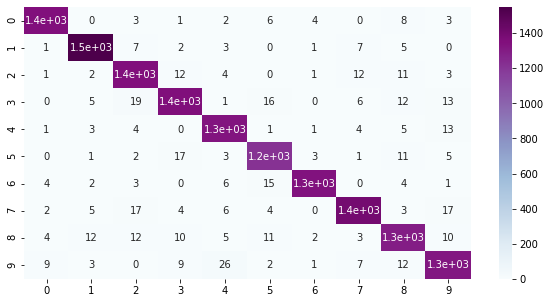

In [11]:
plt.figure( figsize=(10,5) )
y_pred = model.predict( x_test )
CM     = m.confusion_matrix( y_test, y_pred )
sb.heatmap( CM, annot=True, cmap='BuPu' )
plt.show()

In [12]:
model.predict( [x_test[0]] )

array(['0'], dtype='<U1')

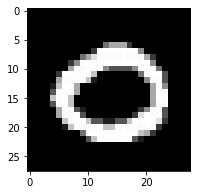

In [13]:
plt.figure(figsize=(3,3))
plt.imshow( x_test[0].reshape(28, 28), cmap=plt.cm.gray )
plt.show()

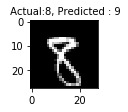

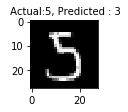

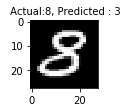

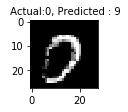

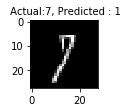

In [16]:
index = 0
misclassficed_Indexs = []
for label, predict in zip( y_test, y_pred ):
    if label != predict:
        misclassficed_Indexs.append( index )
    index += 1
    
for plotindex, badIndex in enumerate( misclassficed_Indexs[0:5] ):
#     print(plotindex)
      plt.figure( figsize=( 7,5) )
      plt.subplot( 1, 5, plotindex + 1 )
      plt.imshow( np.reshape( x_test[ badIndex ], (28,28) ), cmap=plt.cm.gray )
      plt.title( f' Actual:{ y_test[badIndex] }, Predicted : { y_pred[badIndex] }', fontsize=10)

- 강아지 고양이 분류

In [3]:
data_generator = ImageDataGenerator( rescale=1./255 )
traingen =data_generator.flow_from_directory("myimg",target_size=(98, 98), class_mode='sparse', seed=1)

Found 32 images belonging to 2 classes.


In [4]:
x_train, y_train = traingen.next()     # o : cat, 1: dog

In [23]:
x_train.shape, y_train.shape

((32, 98, 98, 3), (32,))

In [24]:
y_train

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

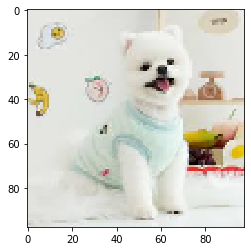

In [25]:
plt.imshow( x_train[0] )
plt.show()

In [5]:
x_reshape = x_train.reshape(32, -1)  # 98*98*3
model = MLPClassifier( verbose=0 )
model.fit( x_reshape, y_train )

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
model.score( x_reshape, y_train )

1.0

In [7]:
model.predict( [x_reshape[0]] )

array([1.], dtype=float32)

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

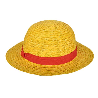

In [9]:
imgdata = image.load_img( 'test/test4.jpg', target_size=(98,98) )
imgdata

In [10]:
testimg = image.img_to_array( imgdata )/255
testimg.shape

(98, 98, 3)

In [11]:
model.predict( testimg.reshape(1,-1) )

array([0.], dtype=float32)

In [12]:
# save model
from sklearn.externals import joblib
joblib.dump( model, 'test1.pkl' )

['test1.pkl']

In [13]:
# read model
mymodel = joblib.load( 'test1.pkl' )
mymodel.predict( testimg.reshape(1, -1) )

array([0.], dtype=float32)